# Logistic Regression Implemented from scratch with Python
## Imports

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import linear_model

import math

## Helper functions for my implementation

In [135]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def loss_function(y_train, prediction):
    return (1/len(y_train))*np.sum(y_train[0] * np.log(prediction).transpose() + (1-y_train[0])*np.log(1-prediction))

def add_theta_0(x, X):
    x["INTERCEPT"] = pd.Series(np.ones(X.shape[0]))
    return x

def normalise(X): 
    min_val = np.min(X, axis = 0) 
    max_val = np.max(X, axis = 0) 
    range_vals = max_val - min_val 
    norm_X = 1 - ((max_val - X)/range_vals) 
    return norm_X 

## Illustrations that may be useful for the blog

Text(0.5, 1.0, 'Illustration of the sigmoid function shape')

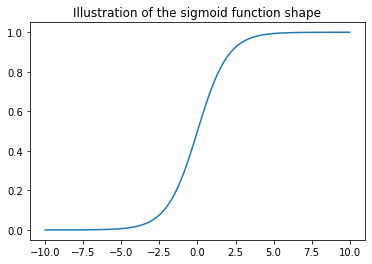

In [136]:
example = np.linspace(-10, 10, 100)
plt.plot(example, sigmoid(example))
plt.title('Illustration of the sigmoid function shape')

Text(3, 0.8, 'Concave')

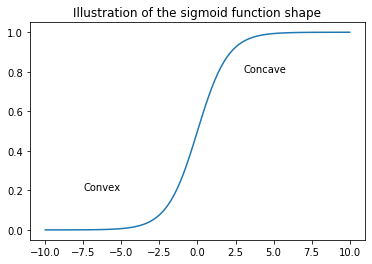

In [137]:
example = np.linspace(-10, 10, 100)
plt.plot(example, sigmoid(example))
plt.title('Illustration of the sigmoid function shape')
plt.annotate('Convex', (-7.5,0.2))
plt.annotate('Concave', (3,0.8))

## Load Iris Classification dataset

In [141]:
# required constants for script
r=0.77; s=1; min_error = 10e-10
num_iters = 10000; alpha = 1.0

iris = datasets.load_iris() # I may end up having to drop one of the labels
 # We will see if I can ge multi-classification to work! 

X = normalise(pd.DataFrame(iris.data[0:99, :2]))
X = add_theta_0(X, X)
y = pd.DataFrame(iris.target[0:99])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [142]:
#### START LOGISTIC REGRESSION ####
# Define variables to store weights and losses
init_weights = np.zeros((len(X_train.columns)))
weights_list = [init_weights]
weights = init_weights
losses = []
prev = math.inf

for n_iter in range(num_iters):
    z = np.dot(weights.T, X_train.T)
    prediction = sigmoid(z)

    loss =- loss_function(y_train, prediction)

    derivative = (1/len(X_train)) * np.dot(X_train.T, (prediction - y_train[0]).transpose())

    weights -= alpha * derivative
    
    losses.append(loss)


Text(0, 0.5, 'loss')

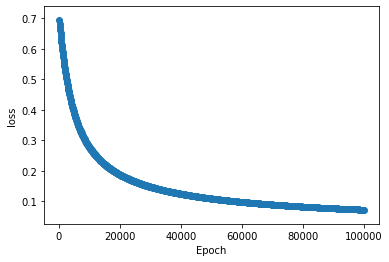

In [144]:
Epoch=pd.DataFrame(list(range(100,100001,100)))
loss=pd.DataFrame(losses)
loss_data=pd.concat([Epoch, loss], axis=1)
loss_data.columns=['Epoch','loss']
plt.scatter(loss_data['Epoch'], loss_data['loss'])
plt.xlabel('Epoch')
plt.ylabel('loss')

In [145]:
# WRITE CODE TO COMPUTE THE ACCURACY AND POSSIBLY SOME OTHER METRICS

## Implement Logistic Regression using Sklearn framework to compare results

In [100]:
logreg = linear_model.LogisticRegression(solver='lbfgs',random_state=0)
logreg.fit(X_train, y_train)

D:\Anaconda\envs\pysyft\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [101]:
predicted_y = logreg.predict(X_test)
print('\nAccuracy: {:.2f}'.format(logreg.score(X_test, y_test)))


Accuracy: 1.00
